# Compare exponential and polynomial fit. Needs tidy up!

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

In [1]:
%config InlineBackend.figure_formats = ['svg']
import math
from numpy import log, exp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (8, 6)   # need bigger size otherwise xlabels are cut-off in svg files

import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')
import scipy
import numpy as np
import iminuit

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')

def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#
def fetch_data(names = ['Confirmed', 'Deaths', 'Recovered']):
    """Return 4 data frames:
    [confirmed, deaths, recovered], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_19-covid-" + name + ".csv")
        df = pd.read_csv(url, index_col=1)
    
        if not name == 'Recovered':
            location_info['Lat'] = df['Lat']
            location_info['Long'] = df['Long']
            location_info['Province/State'] = df['Province/State']
            location_info['location'] = df.index + "-" + df['Province/State']
        else:
            pass  # no location info in recovered since 14 March
        ## df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs



# (confirmed, deaths, recovered), location_infos = fetch_data()
confirmed, deaths, recovered = fetch_data()

# show counries with mosth deaths
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[0:10,-8:]

Confirmed : last data point from 2020-03-22 00:00:00
Deaths    : last data point from 2020-03-22 00:00:00
Recovered : last data point from 2020-03-22 00:00:00


,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00
Country/Region,,,,,,,,
Italy,1809,2158,2503,2978,3405,4032,4825,5476
China,3085,3099,3111,3122,3130,3133,3139,3144
Spain,289,342,533,623,830,1043,1375,1772
Iran,724,853,988,1135,1284,1433,1556,1685
France,91,148,148,148,243,450,562,674
United Kingdom,21,55,55,71,137,177,233,281
Netherlands,20,24,43,58,76,106,136,179
US,3,10,13,16,34,42,60,117
"Korea, South",75,75,81,84,91,94,102,104


def select(country):
    """ Depending on country, need to select/ drop 'Province/State' """
    if country in ['Germany', 'Italy']:
        return 

confirmed.loc['China']

In [2]:
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[:,-8:]


,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00
Country/Region,,,,,,,,
Italy,1809,2158,2503,2978,3405,4032,4825,5476
China,3085,3099,3111,3122,3130,3133,3139,3144
Spain,289,342,533,623,830,1043,1375,1772
Iran,724,853,988,1135,1284,1433,1556,1685
France,91,148,148,148,243,450,562,674
...,...,...,...,...,...,...,...,...
US,0,0,0,0,0,0,0,0
US,0,0,0,0,0,0,0,0
US,0,0,0,0,0,0,0,0


In [3]:
deaths.loc['France']

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-03-13 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
France,France,0,0,0,0,0,0,0,0,0,...,79,91,91,148,148,148,243,450,562,674
France,St Martin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
France,Saint Barthelemy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
France,French Polynesia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
France,French Guiana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
France,Mayotte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
France,Guadeloupe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
France,Reunion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
France,New Caledonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
confirmed.loc['France']

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-03-13 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
France,France,0,0,2,3,3,3,4,5,5,...,3661,4469,4499,6633,7652,9043,10871,12612,14282,16018
France,St Martin,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,3,4,4,4,4
France,Saint Barthelemy,0,0,0,0,0,0,0,0,0,...,1,1,1,3,3,3,3,3,3,3
France,French Polynesia,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,6,11,15,15
France,French Guiana,0,0,0,0,0,0,0,0,0,...,5,5,7,11,11,11,11,15,18,18
France,Mayotte,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,3,3,6,7,11
France,Guadeloupe,0,0,0,0,0,0,0,0,0,...,1,1,3,6,18,27,33,45,53,56
France,Reunion,0,0,0,0,0,0,0,0,0,...,5,6,7,9,9,12,14,28,45,47
France,New Caledonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,4,4


In [5]:
confirmed.loc['France']
#confirmed.loc['France'].drop("Province/State")
confirmed.loc['France'].index



Index(['France', 'France', 'France', 'France', 'France', 'France', 'France',
       'France', 'France'],
      dtype='object', name='Country/Region')

In [74]:
def double_time_exponential(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate(double_time):
    return log(2)/double_time


# t1, t2, q1, q2 = 0, 1, 1, 2
# double_time_exponential(t1, t2, q1, q2), growth_rate(double_time_exponential(t1, t2, q1, q2) )

def double_time_exponential(q2_div_q1, t2_minus_t1=None):
    if t2_minus_t1 is None:
        t2_minus_t1 = np.ones(q2_div_q1.shape)
    return (t2_minus_t1) * (log(2) / log(q2_div_q1) )





def stack_country(country = "Germany"):

    #create one DataFrame for country/region
    c_df = pd.DataFrame()
    if country == "United Kingdom":
        # UK has three Provinces: Channel Islands, Gibraltar and UK. Only need last one
        c_df['confirmed'] = confirmed.loc[country].drop('Province/State', axis=1).iloc[2]
        c_df['recovered'] = recovered.loc[country].drop('Province/State', axis=1).iloc[2]
        c_df['deaths'] = deaths.loc[country].drop('Province/State', axis=1).iloc[2]
    elif country == "China": 
        # Use only Hubei province
        tmp = confirmed.loc[country]
        c_df['confirmed'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        tmp = deaths.loc[country]
        c_df['deaths'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        tmp = recovered.loc[country]
        c_df['recovered'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        c_df.drop("Province/State", inplace=True)
    else:
        c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
        c_df['recovered'] = recovered.loc[country].drop('Province/State')
        c_df['deaths'] = deaths.loc[country].drop('Province/State')


    # Compute those who are infected and have not recovered or died yet and call them 'active'
    c_df['active'] = c_df['confirmed'] - c_df['recovered'] - c_df['deaths']
    
    c_df.index = string_to_date(c_df.index)
    c_df.country = country  # remember which country we work on, just in case
    
    c_df['days-td'] = c_df.index - c_df.index.min()  # days as TimeDelta type
    c_df['days'] = c_df['days-td'].astype("timedelta64[D]").astype(float)
    
    c_df['new_confirmed'] = c_df['confirmed'].diff()
    c_df['new_recovered'] = c_df['recovered'].diff()
    c_df['new_deaths'] = c_df['deaths'].diff()
    c_df['new_active'] = c_df['active'].diff()
    
    c_df['confirmed_pct'] = c_df['confirmed'].pct_change()+1
    c_df['deaths_pct'] = c_df['deaths'].pct_change()+1
    
    # growth rate
    c_df['deaths_double_time'] = double_time_exponential(c_df['deaths_pct'])
    c_df['confirmed_double_time'] = double_time_exponential(c_df['confirmed_pct'])
    c_df['deaths_growth_rate'] = growth_rate(c_df['deaths_double_time'])
    c_df['confirmed_growth_rate'] = growth_rate(c_df['confirmed_double_time'])

    return c_df

In [83]:

c = stack_country("Germany")
c.tail(n=5)
c2 = stack_country("United Kingdom")
#c.tail(n=5)
#c2 = stack_country("Spain")
#c.tail(n=5)
#c2 = stack_country("Italy")
#c2.tail(n=5)
#c2 = stack_country("France")
#c2.tail(n=5)
#c2 = stack_country("China")

                  

In [84]:
def overview_plot(c_df):
    fig, axes = plt.subplots(3, 1, figsize=(8, 14))
    ax = axes[0]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'], 'o-b', label='confirmed')
    ax.plot(c_df.index, c_df['deaths'], 'o-r', label='deaths')
    ax.legend(loc='center left')
    country = c_df.country
    ax.set_title(country + " accumulated data")
    ax.set_yscale('log')
    
    ax = axes[1]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_double_time'], 'xr', label='double time deaths')
    ax.plot(c_df.index, c_df['confirmed_double_time'], 'ob', label='double time confirmed')
    ax.legend(loc='center left')
    ax.set_ylabel('days to double numbers \n bigger is better')
    maxy = min(10, max(c_df['confirmed_double_time']))
    ax.set_ylim(0, maxy)

    ax = axes[2]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_growth_rate'], 'xr', label='growth rate deaths')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'], 'ob', label='confirmed growth rate')
    ax.legend(loc='center left')
    ax.set_ylim(0, 0.5)
    ax.set_ylabel('growth rate r in\n f(t) = exp(r*t)\n(smaller is better)')
    
    # fig.savefig(f"figures/{country}-overview.svg")
    return axes

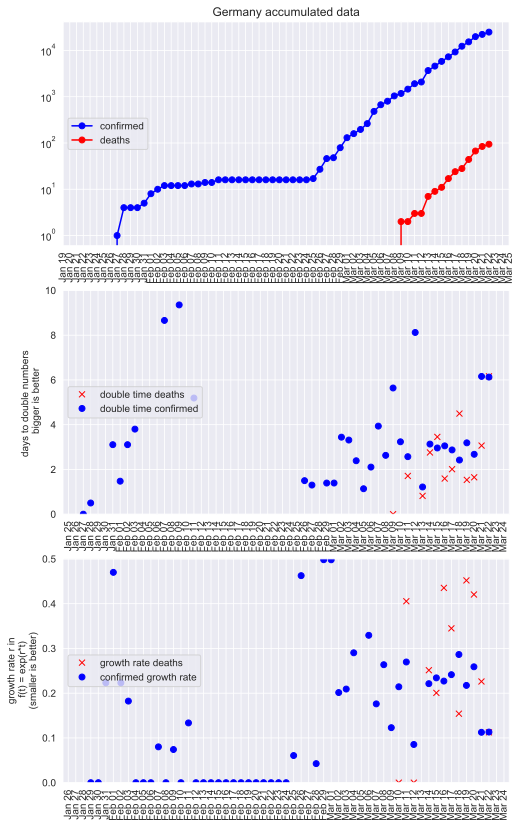

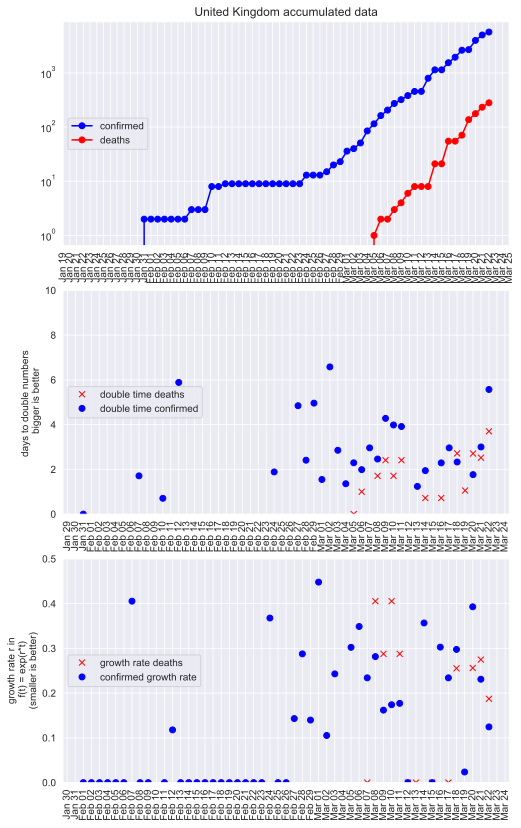

In [85]:
overview_plot(c)
overview_plot(c2);

In [ ]:
# compute doubling time (and growth rate) for a longer sequence of days (by fitting)


reduced chi^2: 0.010772179913542939
r   : 0.0948
t0  : 0.571
a0  : 4.53



------------------------------------------------------------------
| FCN = 0.01077                 |      Ncalls=60 (60 total)      |
| EDM = 2.41E-05 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | r    |   0.09    |   0.09    |            |            |         |         |       |
| 1 | t0   |    0.6    |   29.8    |            |            |         |         |       |
| 2 | a0   |     5     |     5     |            |            |         |         |       |
------------------------------------------------------------------------------------------

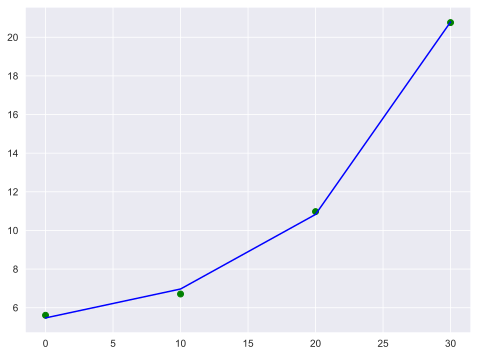

In [141]:
def pretty_params(**par):
    end='\n'
    s = ""
    for p in par:
        s += f"{p:3} : {par[p]:.3g}" + end
    return s


def model(xdata, r, t0, a0):
    return np.exp(r*(xdata-t0))+a0



def exp_fit(xdata, ydata, p0):
    r, t0, a0 = p0
    
    def least_squares(r, t0, a0):
        yvar = 10
        return sum((ydata - model(xdata, r, t0, a0))**2)/yvar
    
    m = iminuit.Minuit(least_squares, 
                       r=r, t0=t0, a0=a0, error_r=0.02, error_t0=0.2, error_a0=1, 
                       errordef=1)
    res = m.migrad()
    print(f"reduced chi^2: {m.fval / (len(ydata) - 3)}")
    r, t0, a0 = m.np_values()
    print(pretty_params(r=r, t0=t0, a0=a0))
    
    return m, res

def plot(xdata, ydata, r, t0, a0):
    #r, t0, a0 = m.np_values()

    fitted = model(xdata, r, t0, a0)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(xdata, ydata, 'og')
    ax.plot(xdata, fitted, '-b')
    #ax.legend(["data", "fit: $n(t) = c(t-t_0)^p+a_0$"])
    #ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
    #ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    #ax.tick_params(axis='x', rotation=90)
    #fig.savefig('figures/infections-with-model-fit.svg')
    # print(fitted_infections)

def test_model(): 
    xdata = np.linspace(0, 30, 4)
    ydata = 0 + np.exp(0.1*(xdata - 0)) + 5*np.random.random_sample(xdata.shape)    
    m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
    r, t0, a0 = m.np_values()
    plot(xdata, ydata, r, t0, a0)
    return res, m, xdata, ydata


res, m, xdata, ydata = test_model()
res


In [ ]:
    
    
def old():
    # for Minuit
    xdata = days = tmp['days']
    ydata = infections = tmp['confirmed']

    def least_squares_exp(t0, p, c, a0):
        yvar = 1000**2
        return sum((ydata - modelexp(xdata, t0, p, c, a0)) ** 2 / yvar)

    def least_squares(t0, p, c, a0):
        yvar = 1000**2
        return sum((ydata - model(xdata, t0, p, c, a0)) ** 2 / yvar)


    from iminuit import Minuit
    p0_e = model_par(t0=-11, p=5, c=0.5, a0=16)   
    t0, p, c, a0 = p0_e
    m_e = Minuit(least_squares_exp, t0=t0, c=c, p=p, a0=a0, error_t0=0.1, error_c=0.1, error_a0=1, error_p=0.01, errordef=1)

In [ ]:
def model_par(t0=None, p=None, c=None, a0=None):
    """Just to order parameters into tuple for curve_fit call"""
    return t0, p, c, a0

def model(t, t0, p, c, a0):
    """Simple model"""
    
    return c*(t-t0)**p + a0 

def modelexp(t, t0, p, c, a0):
    """exp model"""
    return p**((t-t0)/c) + a0 



def pretty_params(param, end="\n"):
    t0, p, c, a0 = param
    s = "p = {:.3f}".format(p) + end
    s += "c = {:.3g}".format(c) + end
    s += "t0= {:.3f}".format(t0) + end
    s += "a0= {:.3f}".format(a0)
    return s

def day_to_date(day, day0=pd.datetime(year=2020, month=1, day=21)):
    """Given the day from day0 (21 Jan 2020), return the data as a string.
    Example output: '26 Jan 2020'
    
    Needed to obtain days for predictions into the future, which are not given in our data frame 'data' yet.
    """
    assert isinstance(day, (int, float)), day
    
    # Compute date
    date = day0 + pd.Timedelta(day, "D")
    # format nicely
    s = date.strftime("%d %b %Y")
    return s

In [ ]:


# deselect data points if necessary to find working fit parameters
# tmp = c2_df.drop(c2_df.index[17]).drop(c2_df.index[16])
# tmp = c2_df.drop(c2_df.index[17])
tmp = c2_df

In [ ]:



# for Minuit
xdata = days = tmp['days']
ydata = infections = tmp['confirmed']

def least_squares_exp(t0, p, c, a0):
    yvar = 1000**2
    return sum((ydata - modelexp(xdata, t0, p, c, a0)) ** 2 / yvar)

def least_squares(t0, p, c, a0):
    yvar = 1000**2
    return sum((ydata - model(xdata, t0, p, c, a0)) ** 2 / yvar)


from iminuit import Minuit
p0_e = model_par(t0=-11, p=5, c=0.5, a0=16)   
t0, p, c, a0 = p0_e
m_e = Minuit(least_squares_exp, t0=t0, c=c, p=p, a0=a0, error_t0=0.1, error_c=0.1, error_a0=1, error_p=0.01, errordef=1)

#p0_p = model_par(t0=0, p=3, c=0.6, a0=0)   
#t0, p, c, a0 = p0_p
#m_p = Minuit(least_squares, t0=t0, c=c, p=p, a0=a0, error_t0=0.1, error_c=0.1, error_a0=1, error_p=0.01, errordef=1)

p0_p = model_par(t0=-1, p=4, c=0.1, a0=0)   
t0, p, c, a0 = p0_p
m_p = Minuit(least_squares, t0=t0, c=c, p=p, a0=a0, error_t0=0.9, error_c=0.9, error_a0=2, error_p=0.1, errordef=1)




In [ ]:
res_e = m_e.migrad()
res_e

In [ ]:
res_p = m_p.migrad()
res_p

In [ ]:
m_p.fval / (len(ydata) - 4)  # reduced chi2

In [ ]:
m_e.fval / (len(ydata) - 4)  # reduced chi2

In [ ]:
param_infections = m_e.np_values()
#param_infections = 0, 2, 1, 0
t0, p, c, a0 = param_infections

fitted_infections = modelexp(c2_df['days'], t0, p, c, a0)
#print("Fit parameters:")
#print(pretty_params(param_infections))

c2_df['date'] = c2_df.index
fig, ax = plt.subplots(figsize=figsize)
ax.plot(c2_df['date'], c2_df['confirmed'], 'og')
ax.plot(c2_df['date'], fitted_infections, '-b')
ax.legend(["data", "fit: $n(t) = c(t-t_0)^p+a_0$"])
ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
ax.tick_params(axis='x', rotation=90)
fig.savefig('figures/infections-with-model-fit.svg')
# print(fitted_infections)

In [ ]:
param_infections = m_p.np_values()
#param_infections = 0, 2, 1, 0
t0, p, c, a0 = param_infections

fitted_infections = model(c2_df['days'], t0, p, c, a0)
#print("Fit parameters:")
#print(pretty_params(param_infections))

c2_df['date'] = c2_df.index
fig, ax = plt.subplots(figsize=figsize)
ax.plot(c2_df['date'], c2_df['confirmed'], 'og')
ax.plot(c2_df['date'], fitted_infections, '-b')
ax.legend(["data", "fit: $n(t) = c(t-t_0)^p+a_0$"])
ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
ax.tick_params(axis='x', rotation=90)
#fig.savefig('figures/infections-with-model-fit.svg')

predictions = pd.DataFrame(columns=['predicted', 'days-ahead', 'prediction-date'])


predictions.loc['31 Jan 2020'] = [100, 10, '31 Jan 2020']

predictions.index

In [ ]:
max(c2_df.index)

In [ ]:
# write model parameters to file
parameter_file = f"figures/{country}-model-parameters.txt"
# create empty file if it doesn't exist
open(parameter_file, 'at').close()
t0, p, c, a0 = param_infections
fitted_infections = modelexp(days, t0, p, c, a0)
# check if we have entry for this date
date = max(c2_df.index).date().isoformat()
# have we written data based on 'date' to the file already?
if date in open(parameter_file, "r").read():
    print(f"Already entry for {date} in {parameter_file}")
else:
    with open(parameter_file, "ta") as f:
        s = f"{date}: {pretty_params(param_infections, end=', ')}"
        print(s)
        f.write(s + "\n")

In [ ]:
!cat figures/germany-model-parameters.txt

# Predictions for confirmed cases

In [ ]:
t0, p, c, a0 = m_e.np_values()
with open("figures/germany-predicted-infections.txt", "tw") as f:
    f.write(f"Predictions for cases in {c_df.country}:\n\n")
    f.write(f"Last data point used in prediction from {max(c2_df.index)}\n\n")
    for future_days in range(1, 30):
        d = int(max(c2_df['days'])) + future_days
        f.write(f"Infections in {future_days:2} days: " +
              f"{int(round(modelexp(d, c=c, t0=t0, p=p, a0=a0))):6}" +
              f" ({day_to_date(d, min(c2_df.index))})\n")
        
        
        
    f.write(f"\nFit parameters: {pretty_params(param_infections, end=' ')}")
!cat figures/germany-predicted-infections.txt

In [ ]:
def insert(what, towhere, tag):
    """Insert table into README.md"""
    # backup original
    cmd = f"cp -vf {towhere} tmp-backup.txt"
    os.system(cmd)
    with open(towhere, "tw") as f_out:
        with open("tmp-backup.txt", "tr") as f_in:
            for line in f_in:
                f_out.write(line)
                if tag in line:
                    f_out.write("<pre>\n")
                    with open(what, "rt") as f_table:
                        for line2 in f_table:
                            f_out.write(line2)
                    # end towhere file here
                    f_out.write("</pre>\n")
                    break
                else:
                    pass
    os.system("rm -f tmp-backup.txt")
                    



insert("figures/germany-predicted-infections.txt", "README.md", tag="[comment]: <> insert table here")

## How long does it take for the number of infections to double?

- in the news, we had 6.4 days (with the recent [Lancet paper](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext) given as the reference)

- based on $n(t') =  2n(t)$, we find $$t' = \left((2(t-t_0)^p+\frac{a_0}{c}\right)^\frac{1}{p} + t_0$$

- the time for infections or deaths to double is thus given by $t' - t$, and we can implement the above equation:

In [ ]:
# def time_to_double(t, t0, p, a0, c):
def time_to_double(t, c, t0, p, a0):
    tprime = (2*(t - t0)**p + a0/c)**(1/p) + t0
    return tprime - t

In [ ]:
day = max(c2_df['days'])
for d in range(3, 30, 2):
    print(f"at day {d:.0f} ({day_to_date(d, min(c2_df.index))}), the time to double n is {time_to_double(d, c, t0, p, a0):.1f} days")

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_confirmed'], color='b')
set_date_formatting(ax)
ax.set_title(f"New confirmed cases per day in {c_df.country}")
fig.savefig(f'figures/new-cases-{c_df.country}.svg')

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_recovered'], color='g')
set_date_formatting(ax)
ax.set_title(f"New recovered cases per day in {c_df.country}")
fig.savefig(f'figures/new-recovered-{c_df.country}.svg')

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_deaths'], color='r')
set_date_formatting(ax)
ax.set_title(f"New deaths per day in {c_df.country}")
fig.savefig(f'figures/new-deaths-{c_df.country}.svg')

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_active'], color='y')
set_date_formatting(ax)
ax.set_title(f"Change in active cases per day in {c_df.country}")
fig.savefig(f'figures/new-active-{c_df.country}.svg')

# Look at some world wide data

In [ ]:
# global data
glob = pd.DataFrame()
glob['deaths'] = deaths.sum(axis=0)
glob['confirmed'] = confirmed.sum(axis=0)
glob['recovered'] = recovered.sum(axis=0)
glob['active'] = glob['confirmed'] - glob['deaths'] - glob['recovered']
glob.index = string_to_date(glob.index)

In [ ]:
pd.set_option('display.max_columns', 200)
glob

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
glob['confirmed'].plot(kind='line', style='-b', ax=ax)
glob['deaths'].plot(kind='line', style='-r', ax=ax)
glob['recovered'].plot(kind='line', style='-g', ax=ax)
glob['active'].plot(kind='line', style='^-y', ax=ax)
set_date_formatting(ax)
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title("Global accumulated");
fig.savefig('figures/global-overview.svg')

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
glob['deaths'].plot(kind='line', style='o-r', ax=ax)
set_date_formatting(ax)
ax.set_title("Global accumulated deaths");
fig.savefig("figures/global-deaths.svg")

In [ ]:
glob['new-deaths'] = glob['deaths'].diff()
glob['new-confirmed'] = glob['confirmed'].diff()

fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-deaths'], color='r' )
set_date_formatting(ax)
ax.set_title("New global deaths per day")
fig.savefig('figures/global-new-deaths.svg');

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-confirmed'], color='b')
set_date_formatting(ax)
ax.set_title("New global confirmed infections per day");
fig.savefig('figures/global-new-infections.svg');

# Any common behaviour in growth of infections?

In [ ]:
# reduce to only countries with more than ncase cases
ncase = 1000
c3 = confirmed[confirmed.sum(axis=1) > ncase]
c3 = c3.drop('Province/State', axis=1)
print(f"Found {len(c3)} data sets with more than {ncase} infections")

In [ ]:

norm = c3.sum(axis=1)

In [ ]:
c4 = c3.div(norm, axis='index')
c4 = c3

In [ ]:
c4.sum(axis=1)
mainland_china = c4.loc['China'].sum()
c5 = c4.drop('China')  # remove the long list of regions in China
# but add summary for China (sum over all regions, then normalised)
#c5.loc['Mainland China (sum)'] = mainland_china/mainland_china.sum()
c5.loc['China (sum)'] = mainland_china

print(f"{len(c5)} data sets remaining after removing regions in China")

In [ ]:
c5.iloc[:,-10:].sort_values(by=c5.columns[-1], ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize=(11,8))
styles = ['-og', '+-r', 'v-.', '-.', '-ko', 'b-^', ':b3', '-y', '-r+', 'r-', '-bo', '^-', 'k+', 'k^', 'k:', 'ro']
c5.sort_values(by=c5.columns[-1], ascending=False).T.plot(ax=ax, style=styles)
ax.set_yscale('log')

# Some countries in Europe


In [ ]:
countries = ['Italy', 'France', 'Spain', 'Germany', 'Finland', 'UK', 'Sweden', 'Belgium', 'Croatia', 'Norway', 'Netherlands', 'Iceland']
styles = ['-og', '+-r', 'v-.', '-ok', '-g', 'b-^', ':y', '-y', '-r+', 'g-', '-bo', '^-']
eu_deaths = deaths.loc[countries].T
eu_deaths.drop('Province/State', inplace=True)
eu_cases = confirmed.loc[countries].T
eu_cases.drop('Province/State', inplace=True)

In [ ]:
eu_deaths.tail()

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
eu_deaths.plot(kind='line', ax=ax, style=styles)
ax.set_yscale('log')
ax.set_title("Deaths in some European countries (log scale)");

In [ ]:
eu_cases.tail()

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
eu_cases.plot(kind='line', ax=ax, style=styles)
ax.set_yscale('log')
ax.set_title("Confirmed infections in some European countries (log scale)");


In [ ]:
fig, ax = plt.subplots(figsize=figsize)
eu_cases.plot(kind='line', ax=ax, style=styles)
ax.set_title("Confirmed infections in some European countries");

Log basics ...

In [ ]:
# 100 increase -> doubling period should be 1 day

In [ ]:
from math import log 
log(2)/log(0.5)

From https://en.wikipedia.org/wiki/Doubling_time
    
$$\Delta t = (t_2 - t_1) * \left(\frac{\log(2)}{\log
    \left(\frac{f(t_2)}{f(t_1)}\right)}\right)$$

In [ ]:
from math import log
def double_time_exponential(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate(double_time):
    return log(2)/double_time


t1, t2, q1, q2 = 0, 1, 1, 2
double_time_exponential(t1, t2, q1, q2), growth_rate(double_time_exponential(t1, t2, q1, q2) )

In [ ]:
2**(1/double_time_exponential(0, 1, 1, 21))

In [ ]:
2/math.exp(1)

In [ ]:
math.exp(0.5)/2

In [ ]:
math.exp(0.6931471805599453*4)